# Week 2 (2/8-2/14)

## k-NN

* supervised learning
* k-Nearest Neighbors (k-NN) algorithm 
* [Project: Recognizing digits with k-NN](../Projects/mnist_with_knn/mnist_with_knn.ipynb)

## Resources

### 1. Plotting nearest neighbors

In [43]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize


def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    """
    Plots nearest neighbors of a given point.
    
    X: 
        A 2-dimensional numpy array with coordinates
        of points in clusters
    y:
        A 1-dimensional numpy array with labels of points
    p:
        An array with coordinates of the point whose 
        neighbors will be plotted. 
    p_label:
        The predicted label of the point p. 
    neighbors:
        A list of row numbers of X which are the nearest 
        neighbors of the point p. 
    """

    n = len(set(y))
    col_list = ['dodgerblue', 'fuchsia', 'limegreen', 'orange', 'darkred']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))
    plt.figure(figsize=(8, 8))
    with plt.style.context('ggplot'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)

        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(handles=scatter.legend_elements()[0],
                   labels=range(n),
                   bbox_to_anchor=(1.05, 1),
                   loc='upper left')
    plt.show()

Sample usage:

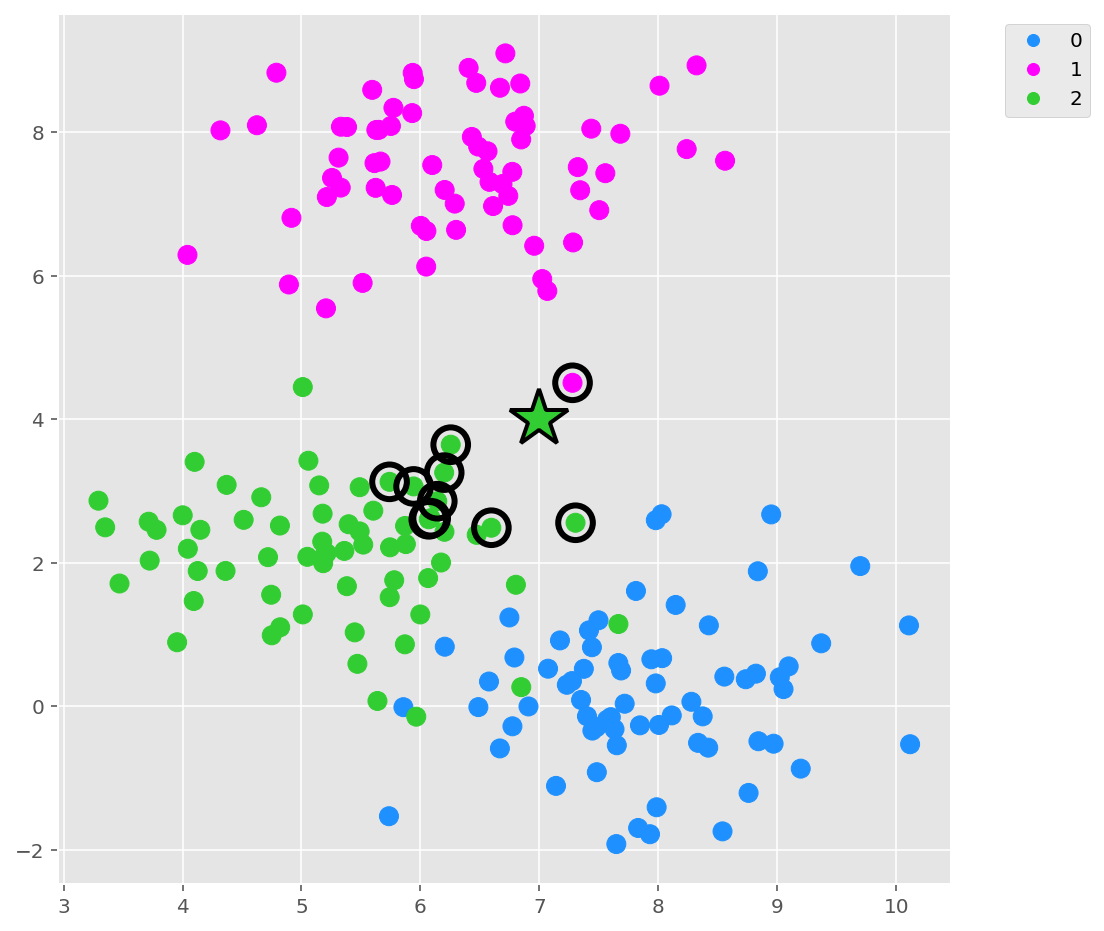

In [44]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=3,
                  center_box=(0, 10),
                  cluster_std=1,
                  random_state=10
                 )
p = [7, 4] 
p_label = 2
neighbors = [103, 109,  24, 164, 131,  82, 122,   7,  21,  80]
plot_clusters(X, y, p, p_label, neighbors)